In [1]:
import os
os.chdir("../../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from simulation import state_base, params_base, vesting_schedule_translate

from IPython.display import display
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint

ms = load_from_json(deepcopy(math_spec_json))
msi = ms.build_implementation(params_base)

Placeholder has no control action options


## All Source Code for Used Components

In [2]:
keys = [x.name for x in ms.wiring['Unlock Tokens Wiring'].components_full()]
msi.print_source_code_files(keys)

--------------------Unlock Tokens Policy--------------------
def unlock_tokens_policy_v1(state, params, spaces):
    current_time = state["Time"]
    unlocked_qi = 0
    unlocked_quai = 0
    unlock_schedule_quai = state["Quai Unlock Schedule"]
    unlock_schedule_qi = state["Qi Unlock Schedule"]

    while len(unlock_schedule_quai) > 0:
        if unlock_schedule_quai[0]["time"] <= current_time:
            unlocked_quai += unlock_schedule_quai.pop(0)["amount"]
        else:
            break

    while len(unlock_schedule_qi) > 0:
        if unlock_schedule_qi[0]["time"] <= current_time:
            unlocked_qi += unlock_schedule_qi.pop(0)["amount"]
        else:
            break

    space = {
        "Qi Tokens": unlocked_qi,
        "Quai Tokens": unlocked_quai,
        "Quai Unlock Schedule": unlock_schedule_quai,
        "Qi Unlock Schedule": unlock_schedule_qi,
    }

    return [space]





--------------------Unlock Tokens Mechanism--------------------
def unlock_tokens_mech

In [3]:

state, params = msi.prepare_state_and_params(state_base, params_base,
                                             state_preperation_functions=[vesting_schedule_translate],
                                             parameter_preperation_functions=[])

spaces = []
spaces = msi.blocks["Unlock Tokens Control Action"](state, params, spaces)
spaces = msi.blocks["Unlock Tokens Policy"](state, params, spaces)
spaces = msi.blocks["Unlock Tokens Mechanism"](state, params, spaces)

In [4]:
time = list(range(0, 365*6+1))
locked_quai = []
circulating_quai = []

msi = ms.build_implementation(params_base)
state, params = msi.prepare_state_and_params(state_base, params_base,
                                             state_preperation_functions=[vesting_schedule_translate],
                                             parameter_preperation_functions=[])

for t in time:
    state['Time'] = t
    msi.wiring['Unlock Tokens Wiring'](state, params, [])
    locked_quai.append(state["Locked Quai Supply"])
    circulating_quai.append(state["Stateful Metrics"]["Circulating Quai Supply"](state, params))

Placeholder has no control action options


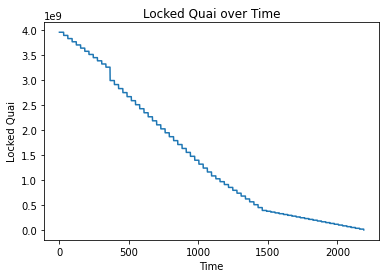

In [5]:
import matplotlib.pyplot as plt

plt.plot(time, locked_quai)
plt.xlabel("Time")
plt.ylabel("Locked Quai")
plt.title("Locked Quai over Time")
plt.show()

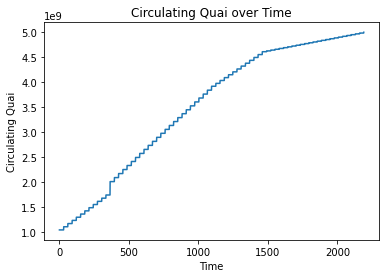

In [6]:
plt.plot(time, circulating_quai)
plt.xlabel("Time")
plt.ylabel("Circulating Quai")
plt.title("Circulating Quai over Time")
plt.show()